In [1]:
import re
import os.path as osp
import pandas as pd
from configuration import Config
from data_prep.data_utils import build_patch_image_with_target_highlight

config = Config()


def extract_pattern(response_sentence):
    """
    Extract the response pattern (e.g., 'left', 'middle', 'right') from the model output.
    """
    pattern = r"\b(left|middle|right)\b"
    match = re.search(pattern, response_sentence.lower())
    return match.group(0) if match else None


def utterances_to_dialogue_string(utterances):
    lines = [f'{intl}: {utt}' for intl, utt, _ in utterances]
    return '\n'.join(lines)

# define prompts
TOP_INSTRUCTION = 'In this image you can see three color patches. In the following dialogue, the speaker I will describe exactly one of the patches. Please indicate to me whether he refers to the left, middle or right patch.'
BOTTOM_PROMPT = 'Is it the left, middle or right patch?'


# settings
img_kwargs = {
    "patch_size": config.patch_size*3,
    "patch_padding": config.grid_padding,
    "patch_pad_color": config.grid_pad_color,
}


# load data
data_df = pd.read_json(osp.join(config.data_dir, "color_patch_data.json"))

In [2]:
data_iter = data_df.iterrows()

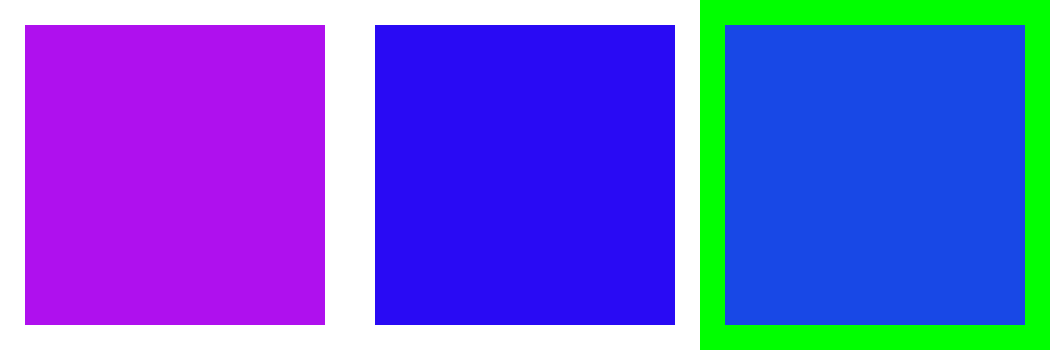

speaker: The darker blue one
target: 2


In [3]:
idx, entry = next(data_iter)

# fetch utteranes and generate input image
utts = entry.conversation
img = build_patch_image_with_target_highlight(entry.hls_values, entry.l_order_t_distr1_distr2, **img_kwargs, highlight_target=True)

# convert utterances into compatible format
dialogue_string = utterances_to_dialogue_string(utts)
full_prompt = '\n\n'.join([TOP_INSTRUCTION, dialogue_string, BOTTOM_PROMPT])

display(img)
print(dialogue_string)
print(f'target: {entry.l_order_t_distr1_distr2.index(0)}')